In [28]:
%matplotlib inline

In [30]:
import pandas as pd

crazy_hat = pd.read_csv('crazy-hat.tsv', sep='\t')
crazy_hat.head()

,x,y,group
0,0,22,outline
1,16,-18,outline
2,-16,-18,outline
3,0,22,outline
4,-3,7,leye


### Plot crazy hat (Without rotation)

In [31]:
crazy_hat.group.unique()

array(['outline', 'leye', 'reye', 'mouth'], dtype=object)

We have 4 groups outline, leye (left eye), reye (right eye) and mouth.

In [32]:
#extract the different groups from crazy hat into a list
groups = list(crazy_hat.group.unique())
groups

['outline', 'leye', 'reye', 'mouth']

In [33]:

#collect distinct categories in a dictionary
group_spec ={groups[0]:{'color':'black','linewidth':1},
           groups[1]:{'color':'brown','linewidth':1},
           groups[2]:{'color':'brown','linewidth':1},
           groups[3]:{'color':'red','linewidth':2}}

group_spec    

{'outline': {'color': 'black', 'linewidth': 1},
 'leye': {'color': 'brown', 'linewidth': 1},
 'reye': {'color': 'brown', 'linewidth': 1},
 'mouth': {'color': 'red', 'linewidth': 2}}

In [34]:
#create plot function
def plot_fig(fig,group):
    ax.plot(fig[:,0], fig[:,1], marker = 'o', color = group_spec[group]['color'], 
            linewidth = group_spec[group]['linewidth'])
    ax.set_aspect('equal')

### Plot crazy hat

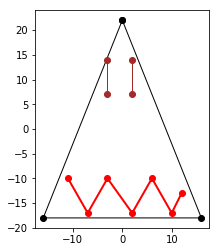

In [35]:
ax = plt.axes(label = 'image')

for group in groups:
    a = np.array(crazy_hat[crazy_hat['group'] == group][['x','y']]) 
    plot_fig(a,group)
    
#Display plot
plt.show()

### Rotate crazy hat

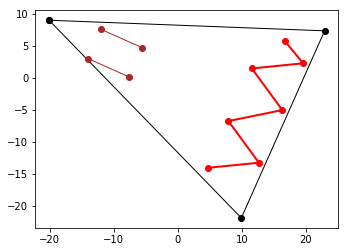

In [48]:
#Create rotation function
def rotation(x, degrees):
    radians = (degrees * np.pi)/180
    y = np.array([[np.cos(radians),-np.sin(radians)], [np.sin(radians),np.cos(radians)]])
    return x.dot(y)

#rotate 66 degrees counter clockwise
ax = plt.axes(label = 'image')
for group in groups:
    a = np.array(crazy_hat[crazy_hat['group'] == group][['x','y']]) 
    a = rotation(a,-66)
    plot_fig(a,group)
    
#Display plot
plt.show()

### Manipulate crazy hat

#### Rotation along y axis

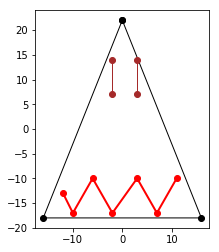

In [42]:
def y_flip(x):
    y = np.array([[-1,0],[0,1]])
    return x.dot(y)

#do a y flip
ax = plt.axes(label = 'image')
for group in groups:
    a = np.array(crazy_hat[crazy_hat['group'] == group][['x','y']])
    a = y_flip(a)
    plot_fig(a,group)
    
#Creating the plot    
plt.show()

#### Stretch it 

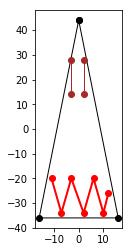

In [44]:
def stretch_fig(x,stretch=2):
    y = np.array([[1,0],[0,stretch]])
    return x.dot(y)

#stretch the figure 
ax = plt.axes(label = 'image')
for group in groups:
    a = np.array(crazy_hat[crazy_hat['group'] == group][['x','y']])
    #stretch
    a = stretch_fig(a)
    plot_fig(a,group)
    
#Creating the plot    
plt.show()

#### Rotate, flip, stretch, rotate

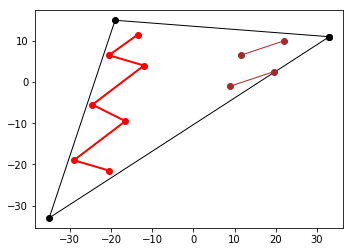

In [47]:
ax = plt.axes(label = 'image')
for group in groups:
    a = np.array(crazy_hat[crazy_hat['group'] == group][['x','y']])
    #rotate 45 counter clockwise
    a = rotation(a, -45)
    #flip 
    a = y_flip(a)
    #stretch
    a = stretch_fig(a)
    #rotate back
    a = rotation(a, 45)
    #Plotting the group 
    plot_fig(a,group)
    
#Creating the plot    
plt.show()

#### Print transformation matrix

In [26]:
identity_2 = np.identity(2)
print(identity_2)

[[1. 0.]
 [0. 1.]]


In [27]:
identity_2 = rotation(identity_2,np.radians(-45))
identity_2 = y_flip(identity_2)
identity_2 = stretch_fig(identity_2)
identity_2 = rotation(identity_2,np.radians(45))

print(identity_2)

[[0.5 1.5]
 [1.5 0.5]]


### Manipulate bitmap images

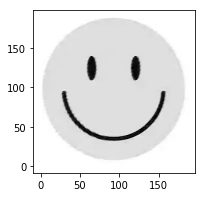

In [49]:
from matplotlib.image import imread
img = imread('smiley.png')
# note: rows x columns x colors (not width x height!)
R = img[:,:,1]  # select color channel 2, G
## create coordinate matrix
xx, yy = np.meshgrid(np.arange(R.shape[1]),
                     np.arange(R.shape[0], 0, -1))
X = np.stack((xx.ravel(), yy.ravel()), axis=1)
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,0], X[:,1], c=R.ravel(), marker='.', cmap="Greys_r")
ax.set_aspect('equal')
plt.show()

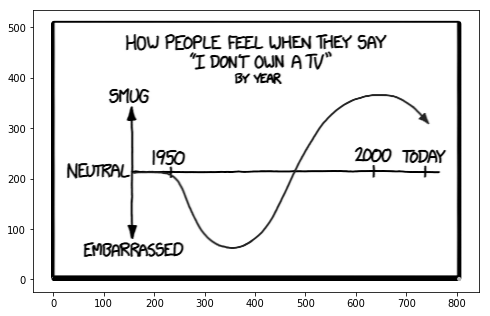

In [51]:
from matplotlib.image import imread
img = imread('dont-own-tv.png')
# note: rows x columns x colors (not width x height!)
R = img[:,:,1]  # select color channel 2, G
## create coordinate matrix
xx, yy = np.meshgrid(np.arange(R.shape[1]),
                     np.arange(R.shape[0], 0, -1))
X = np.stack((xx.ravel(), yy.ravel()), axis=1)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,0], X[:,1], c=R.ravel(), marker='.', cmap="Greys_r")
ax.set_aspect('equal')
plt.show()

In [52]:
square_stretch = img.shape[1]/img.shape[0]
square_stretch

1.5834970530451866

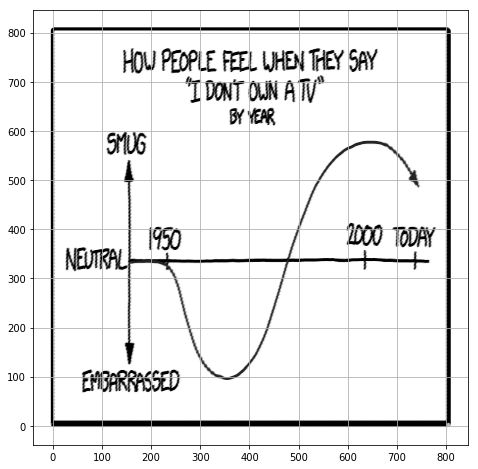

In [54]:
img = imread('dont-own-tv.png')
# note: rows x columns x colors (not width x height!)
R = img[:,:,1] # select color channel 2, G
## create coordinate matrix
xx, yy = np.meshgrid(np.arange(R.shape[1]),
np.arange(R.shape[0], 0, -1))
X = np.stack((xx.ravel(), yy.ravel()), axis=1)
X=stretch_fig(X, square_stretch)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,0], X[:,1], c=R.ravel(), marker='.', cmap="Greys_r")
ax.set_aspect('equal')
plt.grid()
plt.show()

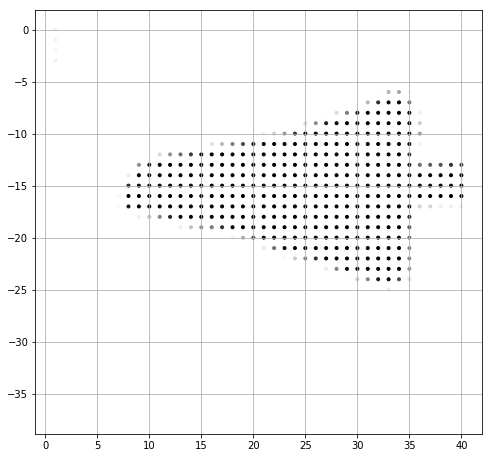

In [88]:
img = imread('dont-own-tv.png')
img=img[400:440,142:180,:]

# note: rows x columns x colors (not width x height!)
R = img[:,:,1] # select color channel 2, G
## create coordinate matrix
xx, yy = np.meshgrid(np.arange(R.shape[1]),
np.arange(R.shape[0], 0, -1))
X = np.stack((xx.ravel(), yy.ravel()), axis=1)
X = rotation(X, 90)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,0], X[:,1], c=R.ravel(), marker='.', cmap="Greys_r")
ax.set_aspect('equal')
plt.grid()
plt.show()